In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("lung cancer.csv")

In [3]:
#Checking to see if there are any null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['GENDER', 'LUNG_CANCER'], dtype='object')


In [5]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformation
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [6]:
# Handling missing values - fill missing values instead of dropping rows
df.fillna(method='ffill', inplace=True)

<ipython-input-6-9a2cb5b5889d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
# Splitting data into fea-tures and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
print(X.shape)

(5871, 15)


In [8]:
data_clean = df.dropna()

In [9]:
# Assuming 'LUNG_CANCER' is the target column
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Store best models
best_models = {}

In [12]:
### Logistic Regression ###
log_reg = LogisticRegression(max_iter=500)
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)
best_models['Logistic Regression'] = log_reg_cv.best_estimator_

In [13]:
### Decision Tree ###
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_cv.fit(X_train, y_train)
best_models['Decision Tree'] = dt_cv.best_estimator_

In [14]:
### Random Forest ###
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)
best_models['Random Forest'] = rf_cv.best_estimator_


ElasticNet (Combination of Ridge & Lasso)
Combines L1 & L2 regularization to balance coefficient shrinkage and sparsity.

Hyperparameters to tune:

alpha: Strength of penalty
l1_ratio: Balance between L1 (Lasso) & L2 (Ridge)

In [15]:
# ### Linear Regression (No hyperparameters, just cross-validation) ###
# lr = LinearRegression()
# best_models['Linear Regression'] = lr.fit(X_train, y_train)

### ElasticNet (Lasso + Ridge) instead of Linear Regression ###
elastic_net = ElasticNet()
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic_cv = GridSearchCV(elastic_net, elastic_params, cv=5, scoring='r2')
elastic_cv.fit(X_train, y_train)
best_models['ElasticNet Regression'] = elastic_cv.best_estimator_



In [16]:
### Gradient Boosting ###
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
gb_cv = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_cv.fit(X_train, y_train)
best_models['Gradient Boosting'] = gb_cv.best_estimator_

In [17]:
### XGBoost ###
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
xgb_cv = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
best_models['XGBoost'] = xgb_cv.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [18]:
### Gaussian Naïve Bayes ###
gnb = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(-9, 0, 10)}
gnb_cv = GridSearchCV(gnb, gnb_params, cv=5, scoring='accuracy')
gnb_cv.fit(X_train, y_train)
best_models['GaussianNB'] = gnb_cv.best_estimator_

In [19]:
### Support Vector Machine (SVM) ###
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svm_cv = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_cv.fit(X_train, y_train)
best_models['SVM'] = svm_cv.best_estimator_


🔹 Logistic Regression Evaluation 🔹
Accuracy: 0.9404
Precision: 0.9661
Recall (Sensitivity): 0.9661
Specificity: 0.7569
F1-Score: 0.9661
Confusion Matrix:
[[109  35]
 [ 35 996]]
Classification Report:
              precision    recall  f1-score   support

  Non-Cancer       0.76      0.76      0.76       144
      Cancer       0.97      0.97      0.97      1031

    accuracy                           0.94      1175
   macro avg       0.86      0.86      0.86      1175
weighted avg       0.94      0.94      0.94      1175

--------------------------------------------------

🔹 Decision Tree Evaluation 🔹
Accuracy: 0.9966
Precision: 0.9961
Recall (Sensitivity): 1.0000
Specificity: 0.9722
F1-Score: 0.9981
Confusion Matrix:
[[ 140    4]
 [   0 1031]]
Classification Report:
              precision    recall  f1-score   support

  Non-Cancer       1.00      0.97      0.99       144
      Cancer       1.00      1.00      1.00      1031

    accuracy                           1.00      1175
   m

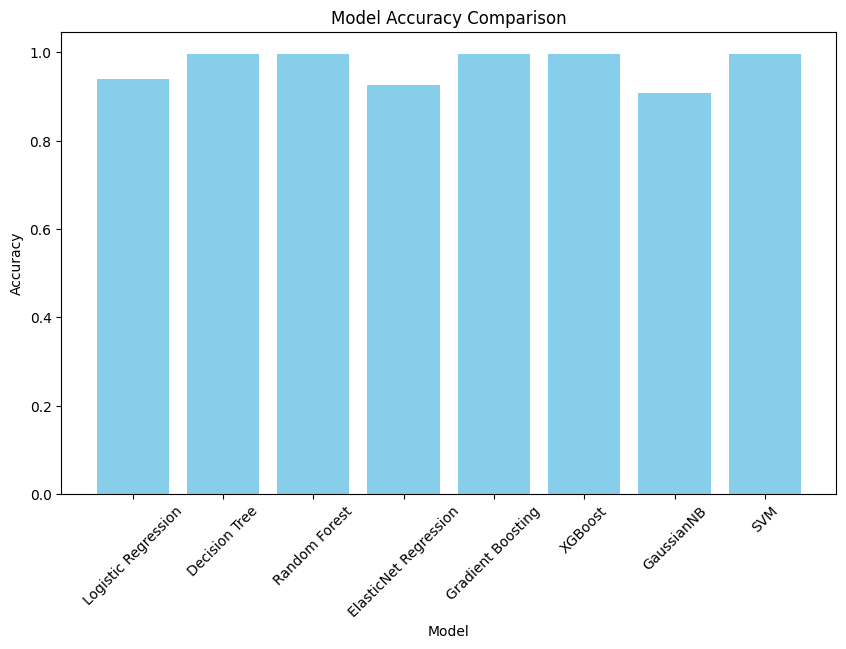

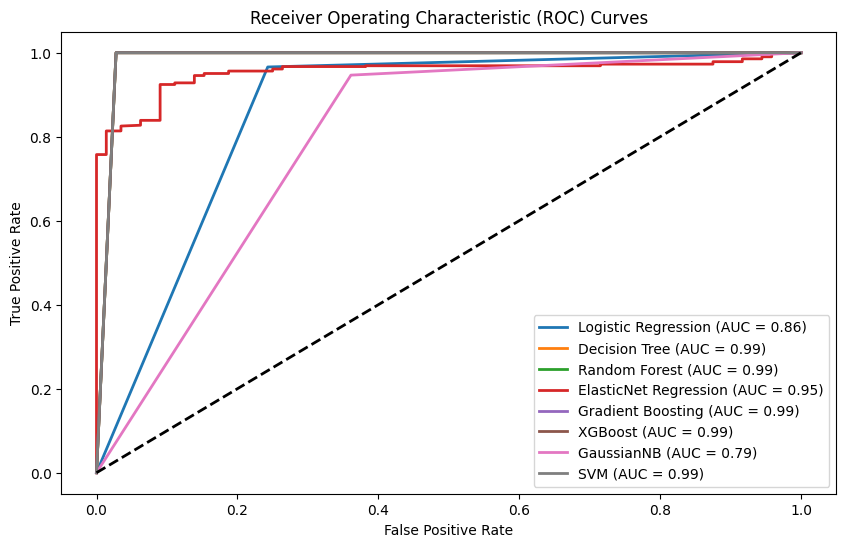

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize lists for plotting
model_names = []
accuracies = []
roc_auc_scores = []

# Evaluate Best Models
model_results = {}

for model_name, model in best_models.items():
    # Predict probabilities if model supports it
    y_prob = model.predict(X_test)

    if y_prob.ndim > 1 and y_prob.shape[1] > 1:  # If model returns probability scores for each class
        y_prob = y_prob[:, 1]  # Use probabilities for class 1 (Cancer)

    # Convert probabilities to binary predictions
    y_pred = (y_prob >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Specificity calculation
    TN, FP, FN, TP = conf_matrix.ravel()  # unpack confusion matrix into TP, TN, FP, FN
    specificity = TN / (TN + FP)  # True Negative Rate

    # Classification report
    class_report = classification_report(y_test, y_pred, target_names=['Non-Cancer', 'Cancer'])

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }

    # Append data for comparison
    model_names.append(model_name)
    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)

# Print Model Evaluation Results
for model, metrics in model_results.items():
    print(f"\n🔹 {model} Evaluation 🔹")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall (Sensitivity): {metrics['Recall']:.4f}")
    print(f"Specificity: {metrics['Specificity']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot ROC Curves for All Models
plt.figure(figsize=(10, 6))
for model_name, metrics in model_results.items():
    plt.plot(metrics['FPR'], metrics['TPR'], lw=2, label=f'{model_name} (AUC = {metrics["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


# Hyper parameter and cross validation techniques used in lung cancer prediction with multi machine learning models.

# Enhancing Lung Cancer Prediction Using Multi-Model Machine Learning: A Comparative Study on Hyperparameter Tuning and Cross-Validation

For standard linear regression, there are no hyperparameters to tune. However, when we extend linear regression to include regularization techniques such as Ridge Regression, Lasso Regression, and Elastic Net, hyperparameters become crucial. These parameters are not directly learned within the estimator; instead, they are given as an argument to the estimator class (linear regression class). Tuning the hyperparameter helps to control the learning process. In linear regression, common hyperparameters include:

In [27]:
# Find the model with the best accuracy
best_accuracy_model = max(model_results, key=lambda model: model_results[model]['Accuracy'])

# Get the accuracy of the best model
best_accuracy = model_results[best_accuracy_model]['Accuracy']

# Display the best model and its accuracy
print(f"The best model is: {best_accuracy_model}")
print(f"Best Accuracy: {best_accuracy:.4f}")


The best model is: Decision Tree
Best Accuracy: 0.9966
